# Model Selection : Random Forest
This part aims to assess the performances of the random forest model

In [1]:
library(randomForest)
training_set <- read.csv("../Data/PreProcess/processed_training_data_split.csv")
validation_set <- read.csv("../Data/PreProcess/processed_verification_data_split.csv") # load training and validation sets

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
column_to_drop<-c("X.1","X","wind.powered","dam","None","X40")
# Dropped "X.1","X" because they just represent the row number
# Also dropped "wind.powered","dam","None" and "X40" because they mean decrease accuracy was 0
training_set<-training_set[,!(names(training_set) %in% column_to_drop)] # drop the desired columns on training set
validation_set<-validation_set[,!(names(validation_set) %in% column_to_drop)] # drop the desired columns on validation set

## Model Setting and Training : 

In [3]:
training_set$id = factor(training_set$id) 
classifierRF = randomForest(id ~ ., data=training_set, ntree=450,  mtry=20, importance=TRUE)
save(classifierRF,file = "4-Models/random_forest.RData")
#bench (funder, installer and  ward dropped)
#tree : 100 , split : 8 , error rate : 22.36% -> ~90% error rate at functional needs repair (worst class) (77% accuracy on val set)
#tree : 200 , split : 8 , error rate : 22.43%
#tree : 80 , split : 8, error rate : 22.49%  
#tree : 100 , split : 10, error rate : 21.84%
#tree : 120 , split : 10, error rate : 21.82%
#tree : 150 , split : 12, error rate : 21.47%  -> ~83% error rate ..... (78% acc. on val. set)
#tree : 120 , split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 8, error rate : 22.26% -> ~90% error rate at functional needs repair
#tree : 120, split : 20, error rate : 21.21% -> ~77% error rate at functional needs repair
#tree : 120, split : 35, error rate : 21.59% -> ~75% error rate at functional needs repair (78% accuracy on validation set)
#tree : 200, split : 25, error rate : 21.13% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 250, split : 28, error rate : 21.12% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 500, split : 25, error rate : 21.2% -> ~76% error rate at functional needs repair (78 % acc. on val. set-)
#(error rate = OOB)

# increasing tree number decreases the variance and keeps the bias constant -> good way to avoid overfitting

# bench with classified funder (big/small):
#tree : 450, split : 20, error rate : 20.99% -> 76% error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 600, split : 18, error rate : 20.94% ->77 % error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 450, split : 18, error rate : 20.88% -> 77% error rate at functional needs repair (78.52% acc. on val. set-)
#tree : 350, split : 18, error rate : 21% ->77 % error rate at functional needs repair (78.48% acc. on val. set-)
#tree : 350, split : 20, error rate : 21% ->76 % error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 350, split : 23, error rate : 21.07% ->75.2 % error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 350, split : 25, error rate : 21.1% -> 74.5% error rate at functional needs repair (78% acc. on val. set-)
#tree : 350, split : 29, error rate : 21.24% -> 73.5% error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 350, split : 27, error rate : 21.29% -> 74.4% error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 350, split : 32, error rate : 21.35% -> 73.5% error rate at functional needs repair (78.4% acc. on val. set-)


## For now : best parameters are at 450 trees and 18 random features per tree (wth funders)
### results -> 78.5% accuracy on validation set BUT still 77% of error rate for the 'functional needs repair' class
## Model Performances (OOB) :


Call:
 randomForest(formula = id ~ ., data = training_set, ntree = 450,      mtry = 20, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 450
No. of variables tried at each split: 20

        OOB estimate of  error rate: 20.94%
Confusion matrix:
                        functional functional needs repair non functional
functional                   22982                     404           2349
functional needs repair       1989                     819            592
non functional                4382                     186          13586
                        class.error
functional                0.1069749
functional needs repair   0.7591176
non functional            0.2516250

,functional,functional.needs.repair,non.functional,MeanDecreaseAccuracy,MeanDecreaseGini
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Trust,7.980261e-06,-1.766304e-06,3.296334e-05,1.686430e-05,7.168772
SWC,-3.146046e-05,0.000000e+00,9.185188e-05,1.813149e-05,5.159185
fluoride,7.041952e-05,5.346612e-06,-2.274493e-05,2.998708e-05,13.986062
cattle.trough,1.575188e-04,-1.067411e-05,-5.682987e-05,6.305357e-05,9.641697
colored,1.487223e-04,9.076467e-04,-7.179398e-05,1.187059e-04,35.884364
X9,2.069026e-04,4.270586e-05,6.018679e-05,1.387077e-04,13.252211
X8,1.286823e-04,1.038713e-03,2.607358e-04,2.445648e-04,20.044529
X7,2.727820e-04,4.085560e-05,4.752892e-04,3.336528e-04,16.849056
X24,8.746727e-04,6.459632e-05,4.744408e-05,4.986987e-04,16.231744


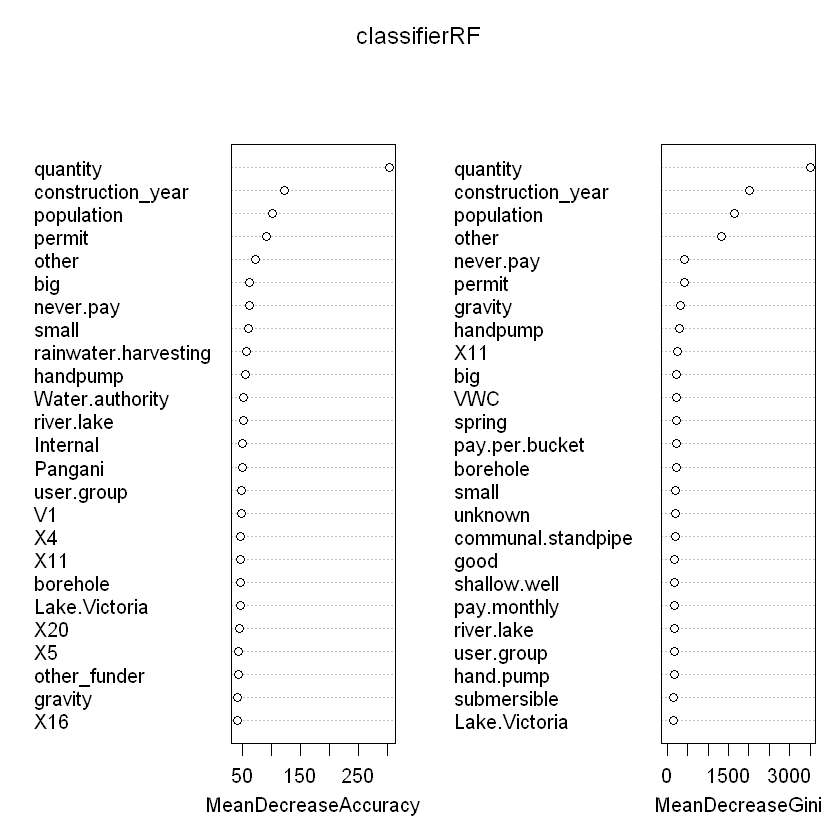

In [4]:
load("4-Models/random_forest.RData")
classifierRF # training outcome
varImpPlot(classifierRF, n.var=min(25, nrow(classifierRF$importance))) # plot mean decrease accuracy per variables
# --> high mean decrease accuracy = variable having a high impact on accuracy
imp<-data.frame(classifierRF$importance)
imp<-imp[order(imp$MeanDecreaseAccuracy),]
imp

### The variables having the highest (positive) impact on model performances are : *quantity*, *construction_year*, *population* and *permit*

## Confusion Matrix on Validation Set :

In [5]:
library(ROCR)
pred <- predict(classifierRF,validation_set) # Model prediction on validation set
dim(validation_set)
table(observed=validation_set$id,predicted=pred) # CONFUSION MATRIX ON VALIDATION SET

[1] 12111    84

                         predicted
observed                  functional functional needs repair non functional
  functional                    5789                     129            605
  functional needs repair        537                     231            149
  non functional                1158                      43           3469